# Import Data

In [81]:
# Import libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Connect to PostgreSQL server
import os
from dotenv import load_dotenv
load_dotenv()
from pangres import upsert
from sqlalchemy import text, create_engine

# db info
db_username = os.environ.get('db_username')
db_password = os.environ.get('db_password')
db_host = os.environ.get('db_host')
db_port = os.environ.get('db_port')
db_name = os.environ.get('db_name')

def create_db_connection_string(db_username, db_password, db_host, db_port, db_name):
    connection_url = 'postgresql+psycopg2://' + db_username + ':' + db_password + '@' + db_host + ':' + db_port + '/' + db_name
    return connection_url

conn = create_db_connection_string(db_username, db_password, db_host, db_port, db_name)

db_engine = create_engine(conn, pool_recycle = 3600)

# Create DataFrame
with db_engine.connect() as connection:
    df = pd.read_sql(text('select * from soloq.matchesv2'), connection)


In [50]:
df.head()

,uuid,totalHealsOnTeammates,largestCriticalStrike,damageSelfMitigated,bountyLevel,consumablesPurchased,spell1Casts,spell2Casts,spell3Casts,spell4Casts,...,sightWardsBoughtInGame,longestTimeSpentLiving,timeCCingOthers,timePlayed,totalTimeCCDealt,totalTimeSpentDead,gameEndedInEarlySurrender,gameEndedInSurrender,teamEarlySurrendered,win
0,NA1_4924206959_NE11HKlSYE5wsbANOMEuIoMR4-mUIhz...,0,19,151576,1,2,133,76,80,16,...,0,386,60,2706,841,359,False,False,False,True
1,NA1_4924206959_uNbMmHbumM_uRxXzyYSq4ELwRdo_IW6...,0,0,62892,2,1,189,139,137,17,...,0,399,9,2706,198,372,False,False,False,True
2,NA1_4924206959_mEJPEQFXkjonzxpxH_eEw36B7QIteqC...,0,899,31583,0,7,86,24,194,23,...,0,455,6,2706,45,727,False,False,False,True
3,NA1_4924206959_jz-fC66zgWp7B_ZCYUyDdQlrWKnLnQw...,0,889,15312,6,11,109,153,48,14,...,0,485,11,2706,234,468,False,False,False,True
4,NA1_4924206959_RpXIl-a4MHzZtES0PwNWFOQltGTZO-u...,2444,0,27500,2,2,79,61,19,10,...,0,440,44,2706,803,191,False,False,False,True


In [47]:
df.shape

(719590, 96)

In [4]:
df.columns

Index(['uuid', 'totalHealsOnTeammates', 'largestCriticalStrike',
       'damageSelfMitigated', 'bountyLevel', 'consumablesPurchased',
       'spell1Casts', 'spell2Casts', 'spell3Casts', 'spell4Casts',
       'summoner1Casts', 'summoner1Id', 'summoner2Casts', 'summoner2Id',
       'matchId', 'teamId', 'gameDuration', 'gameVersion', 'summonerName',
       'puuid', 'lane', 'role', 'summonerLevel', 'teamPosition',
       'champExperience', 'champLevel', 'championName', 'kills', 'deaths',
       'assists', 'doubleKills', 'tripleKills', 'quadraKills', 'pentaKills',
       'largestKillingSpree', 'largestMultiKill', 'killingSprees',
       'firstBloodAssist', 'firstBloodKill', 'unrealKills', 'totalDamageDealt',
       'totalDamageDealtToChampions', 'totalDamageShieldedOnTeammates',
       'totalDamageTaken', 'totalHeal', 'trueDamageDealt',
       'trueDamageDealtToChampions', 'trueDamageTaken', 'magicDamageDealt',
       'magicDamageDealtToChampions', 'magicDamageTaken',
       'physicalDamage

Irrelevant features: uuid, spell 1-4 casts, summoner 1-2 casts, matchid, teamid, gameversion, summonerName, puuid, lane, role, summonerLevel, neutralMinionsKilled, sightWardsBoughtInGame, timePlayed, totalTimeSpentDead, teamEarlySurrendered. These are all features that are either completely irrelevant to champion class, or have duplicates in the dataset.

In [82]:
# Dropping Irrelevant Features
df = df.drop(columns=['uuid', 'spell1Casts', 'spell2Casts', 'spell3Casts', 'spell4Casts',
              'summoner1Casts', 'summoner2Casts', 'matchId', 'teamId',
              'gameVersion', 'summonerName', 'puuid', 'lane', 'role', 'summonerLevel',
              'neutralMinionsKilled', 'sightWardsBoughtInGame', 'timePlayed', 'totalTimeSpentDead', 'teamEarlySurrendered', 'unrealKills',
              'largestMultiKill', 'damageDealtToTurrets', 'inhibitorTakedowns', 'turretTakedowns', 'turretsLost', 'goldSpent',
              'item0', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'detectorWardsPlaced', 'wardsPlaced', 'champLevel', 'totalTimeCCDealt'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719590 entries, 0 to 719589
Data columns (total 58 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   totalHealsOnTeammates           719590 non-null  int64 
 1   largestCriticalStrike           719590 non-null  int64 
 2   damageSelfMitigated             719590 non-null  int64 
 3   bountyLevel                     719590 non-null  int64 
 4   consumablesPurchased            719590 non-null  int64 
 5   summoner1Id                     719590 non-null  int64 
 6   summoner2Id                     719590 non-null  int64 
 7   gameDuration                    719590 non-null  int64 
 8   teamPosition                    719590 non-null  object
 9   champExperience                 719590 non-null  int64 
 10  championName                    719590 non-null  object
 11  kills                           719590 non-null  int64 
 12  deaths                        

# Numerical features

In [7]:
df.select_dtypes(include = np.number).columns

Index(['totalHealsOnTeammates', 'largestCriticalStrike', 'damageSelfMitigated',
       'bountyLevel', 'consumablesPurchased', 'summoner1Id', 'summoner2Id',
       'gameDuration', 'champExperience', 'kills', 'deaths', 'assists',
       'doubleKills', 'tripleKills', 'quadraKills', 'pentaKills',
       'largestKillingSpree', 'killingSprees', 'totalDamageDealt',
       'totalDamageDealtToChampions', 'totalDamageShieldedOnTeammates',
       'totalDamageTaken', 'totalHeal', 'trueDamageDealt',
       'trueDamageDealtToChampions', 'trueDamageTaken', 'magicDamageDealt',
       'magicDamageDealtToChampions', 'magicDamageTaken',
       'physicalDamageDealt', 'physicalDamageDealtToChampions',
       'physicalDamageTaken', 'baronKills', 'damageDealtToBuildings',
       'damageDealtToObjectives', 'objectivesStolen',
       'objectivesStolenAssists', 'dragonKills', 'inhibitorKills',
       'inhibitorsLost', 'turretKills', 'goldEarned', 'totalMinionsKilled',
       'itemsPurchased', 'visionScore', 'vi

In [8]:
df.select_dtypes(include = np.number).describe()

,totalHealsOnTeammates,largestCriticalStrike,damageSelfMitigated,bountyLevel,consumablesPurchased,summoner1Id,summoner2Id,gameDuration,champExperience,kills,...,inhibitorsLost,turretKills,goldEarned,totalMinionsKilled,itemsPurchased,visionScore,visionWardsBoughtInGame,wardsKilled,longestTimeSpentLiving,timeCCingOthers
count,719590.000000,719590.000000,719590.000000,719590.000000,719590.000000,719590.000000,719590.000000,719590.000000,719590.000000,719590.000000,...,719590.000000,719590.000000,719590.000000,719590.000000,719590.000000,719590.000000,719590.000000,719590.000000,719590.000000,719590.000000
mean,460.180433,215.348408,21322.370186,0.965576,3.115320,7.226496,7.647640,1762.248572,13387.333238,6.049680,...,1.026202,1.115985,11421.549061,118.056700,19.860548,25.290292,1.222381,2.398902,590.037471,25.681762
std,1907.729550,370.601043,20251.651109,2.011243,2.608845,4.105470,4.211668,512.245415,5182.538021,4.828174,...,1.312916,1.384409,4267.557996,82.147819,6.085628,20.976498,1.909267,2.931792,305.412497,25.225500
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,101.000000,0.000000,0.000000,...,0.000000,0.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,8482.000000,0.000000,1.000000,4.000000,4.000000,1517.000000,10213.000000,2.000000,...,0.000000,0.000000,8774.000000,37.000000,16.000000,12.000000,0.000000,0.000000,397.000000,10.000000
50%,0.000000,0.000000,15057.000000,0.000000,2.000000,4.000000,6.000000,1792.000000,13403.000000,5.000000,...,0.000000,1.000000,11343.000000,123.000000,20.000000,19.000000,0.000000,1.000000,549.000000,20.000000
75%,0.000000,376.000000,27551.000000,1.000000,4.000000,11.000000,12.000000,2070.000000,16636.000000,9.000000,...,2.000000,2.000000,14078.000000,184.000000,24.000000,30.000000,2.000000,3.000000,747.000000,35.000000
max,81183.000000,8917.000000,392246.000000,38.000000,49.000000,21.000000,21.000000,4108.000000,56411.000000,44.000000,...,11.000000,11.000000,45890.000000,805.000000,129.000000,239.000000,48.000000,54.000000,3163.000000,525.000000


# Distributions

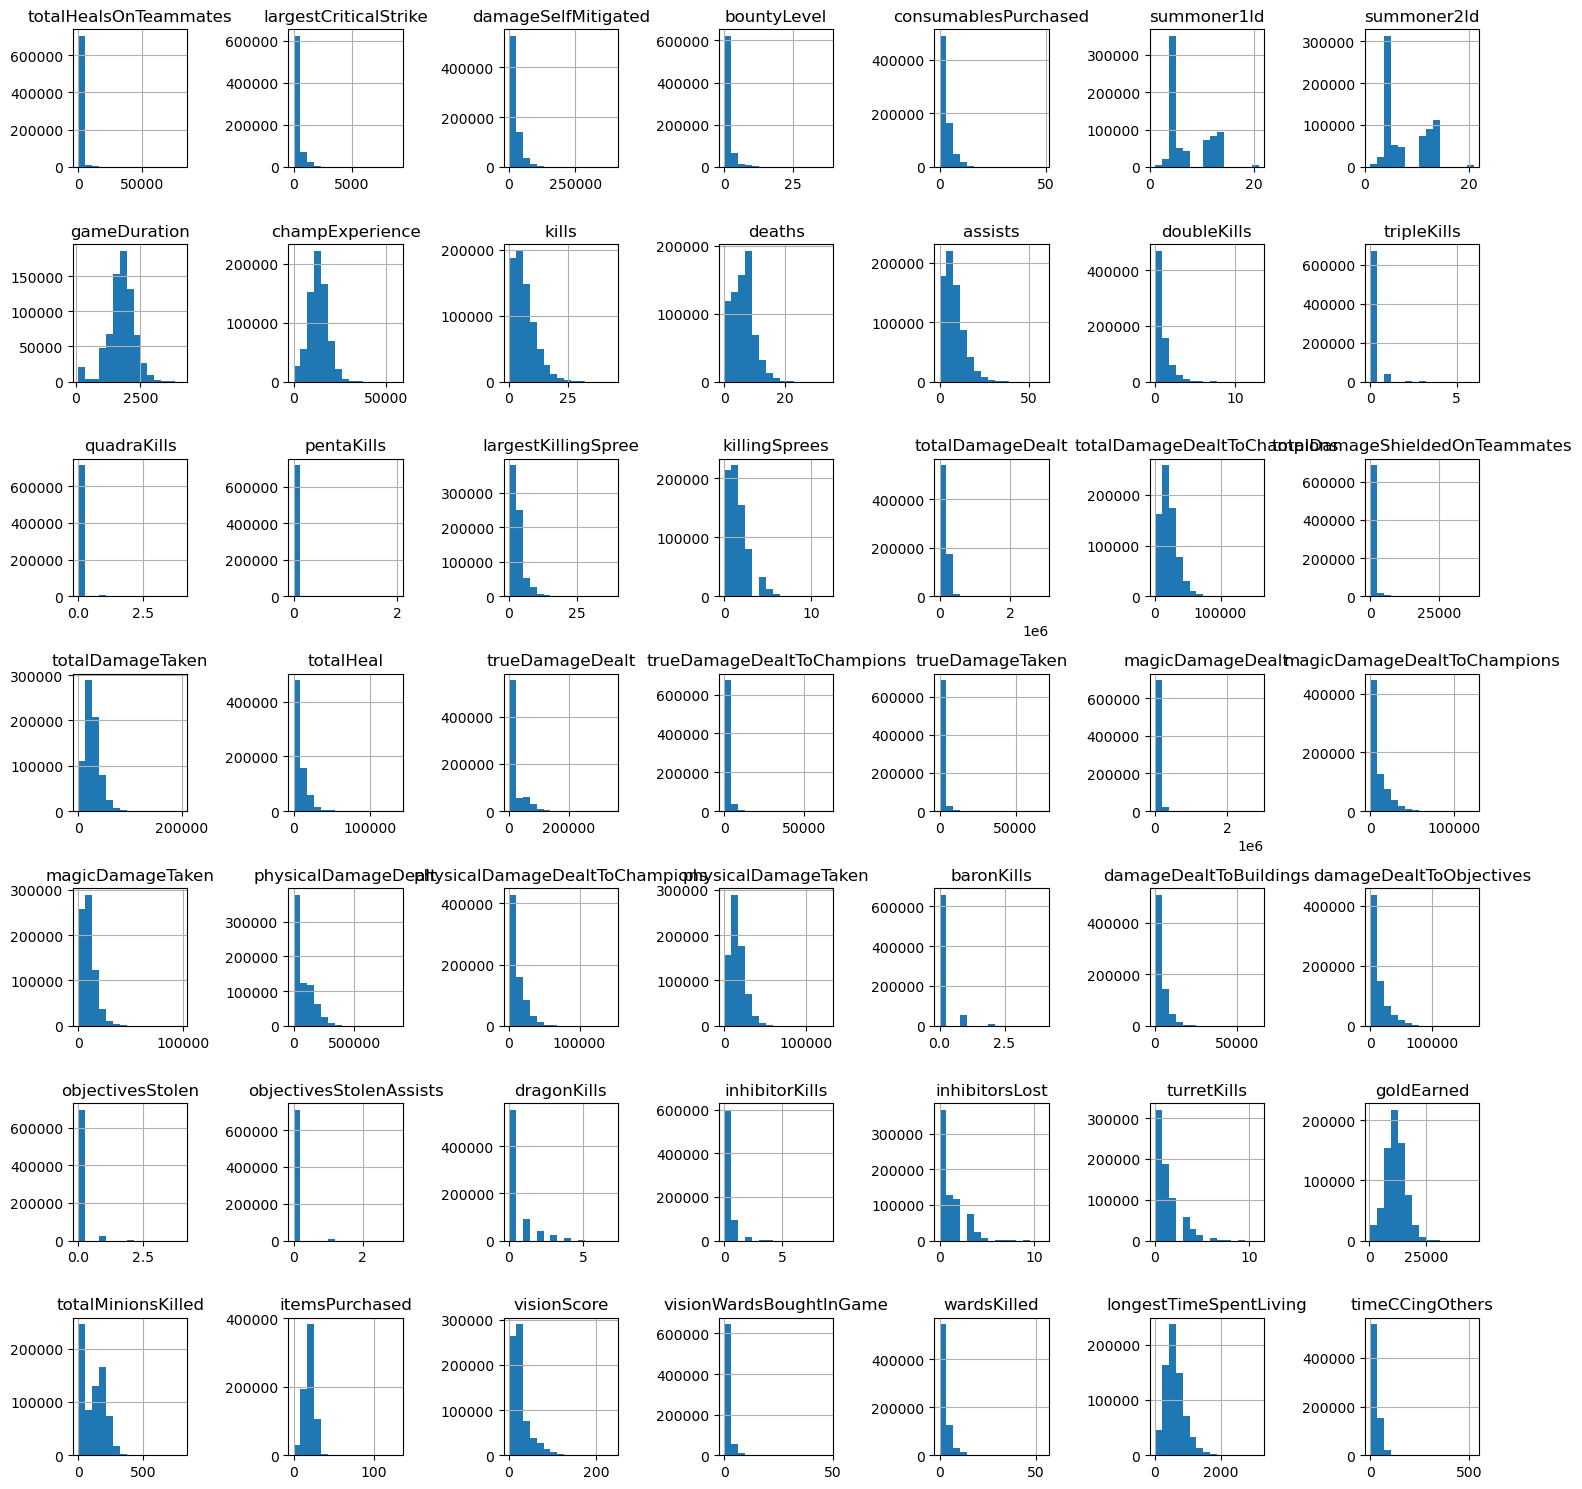

In [9]:
df.select_dtypes(include = np.number).hist(bins = 15, figsize = (15,15))
plt.tight_layout()

In [ ]:
zero_inflated = []
for feature in df.select_dtypes(include = np.number).columns:
    zero_percent = (df[feature] == 0).mean() * 100
    if zero_percent > 90:
        zero_inflated.append(feature)
        print(feature + " has a high proportion of zero values.")

# Drop zero inflated features            
df = df.drop(columns = zero_inflated)

tripleKills has a high proportion of zero values.
quadraKills has a high proportion of zero values.
pentaKills has a high proportion of zero values.
baronKills has a high proportion of zero values.
objectivesStolen has a high proportion of zero values.
objectivesStolenAssists has a high proportion of zero values.


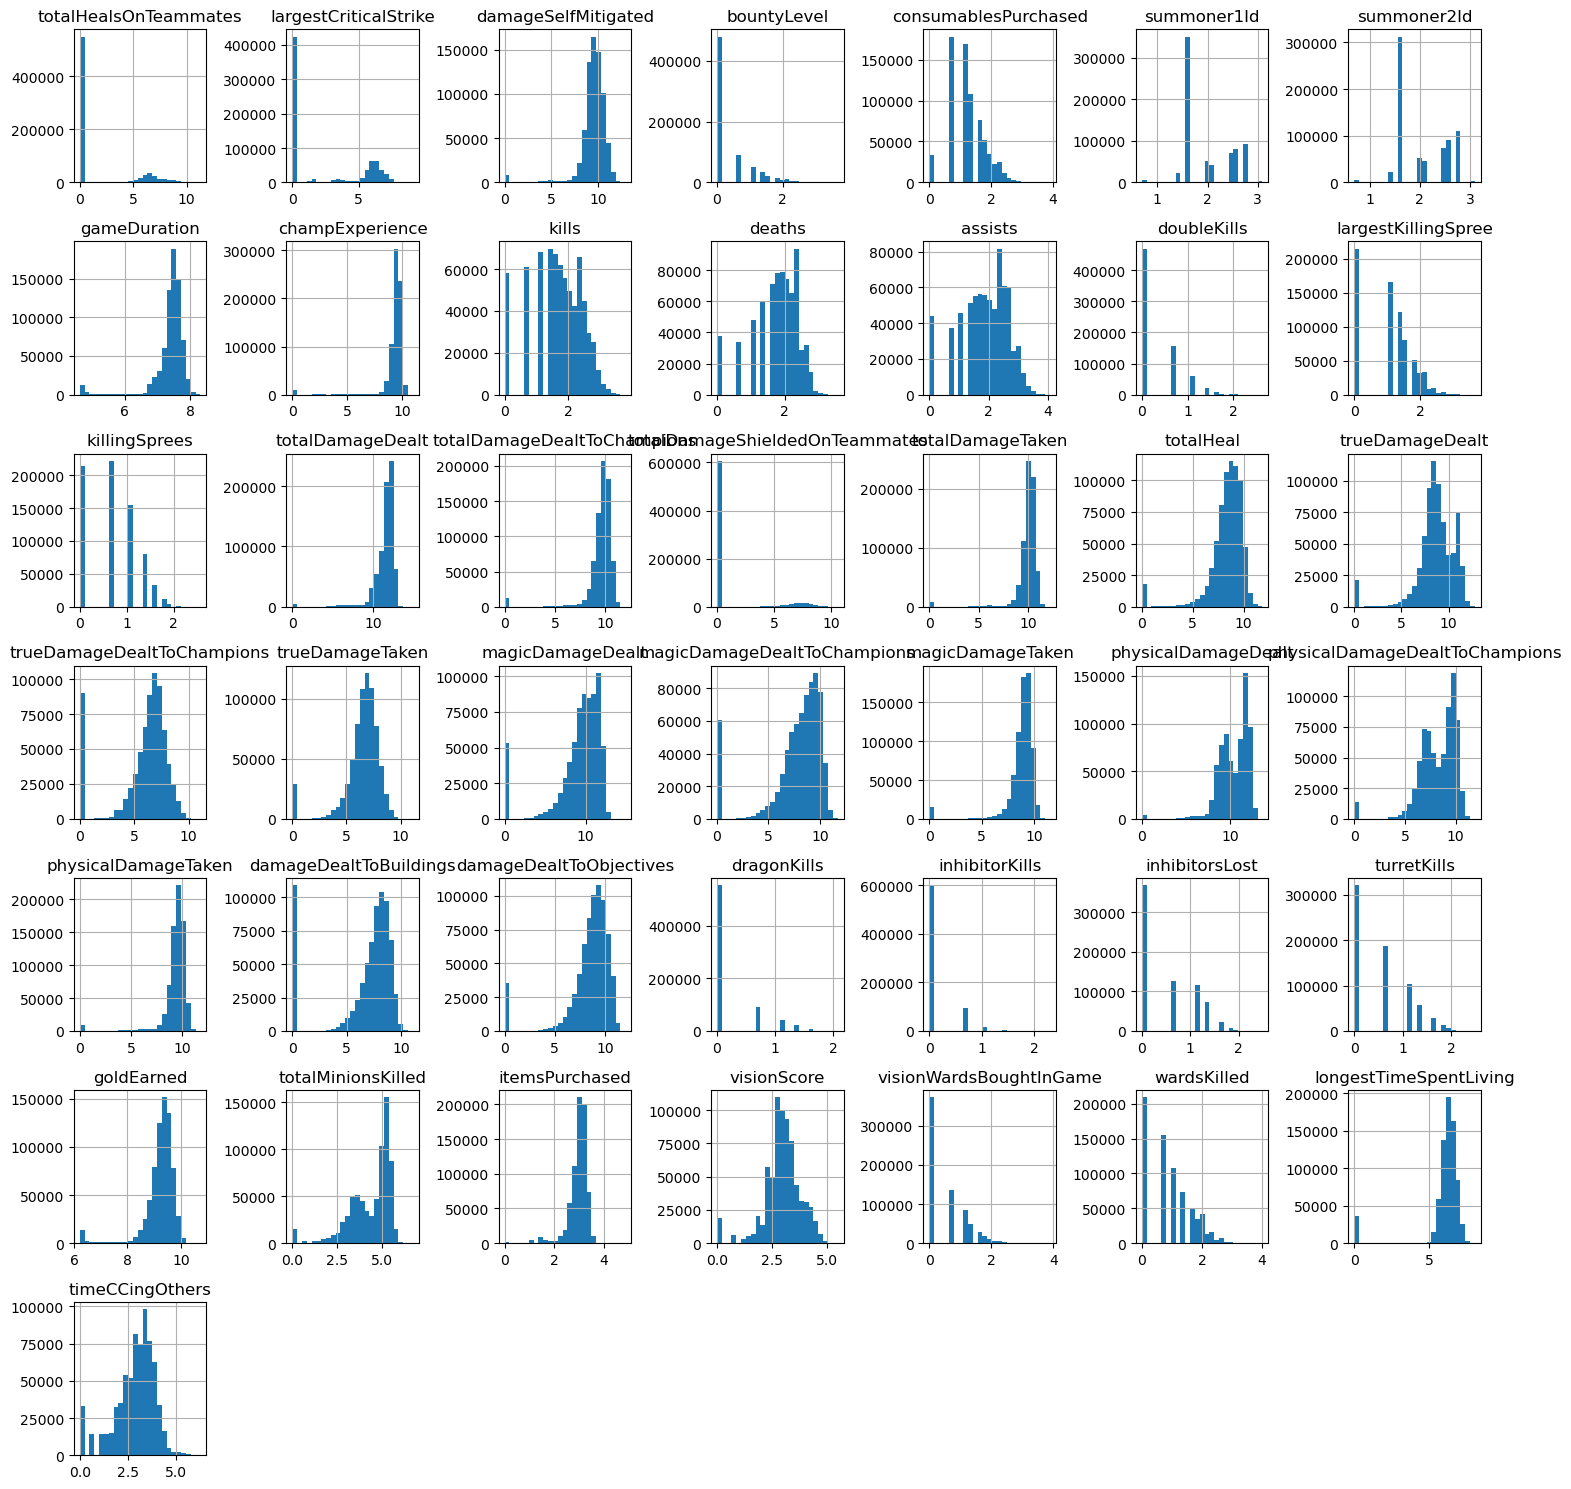

In [87]:
np.log(df.select_dtypes(include = np.number) + 1).hist(bins = 25, figsize = (15,15))
plt.tight_layout()

Many power-law or skewed features seem to benefit from a log transform


In [88]:
log_transform_columns = ["totalHealsOnTeammates", "largestCriticalStrike", "totalDamageShieldedOnTeammates", "totalHeal",
                          "trueDamageDealt", "trueDamageDealtToChampions", "trueDamageTaken", "magicDamageDealt",
                            "magicDamageDealtToChampions", "magicDamageTaken", "physicalDamageDealt",
                              "physicalDamageDealtToChampions", "physicalDamageTaken", "damageDealtToBuildings",
                                "damageDealtToObjectives", "totalMinionsKilled", "visionScore", "timeCCingOthers",
]

## Game Duration

<Axes: xlabel='gameDuration', ylabel='Count'>

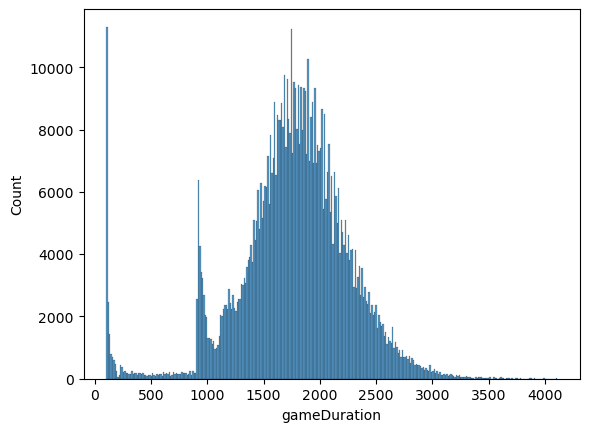

In [14]:
sns.histplot(data = df, x = 'gameDuration')

Normally distributed except huge spike at around 3 minute and 16 minute mark. Most likely represents games that were remade + surrendered as soon as possible (15 minutes is the minimum)

Text(0.5, 1.0, 'Surrendered Games and Normal Games')

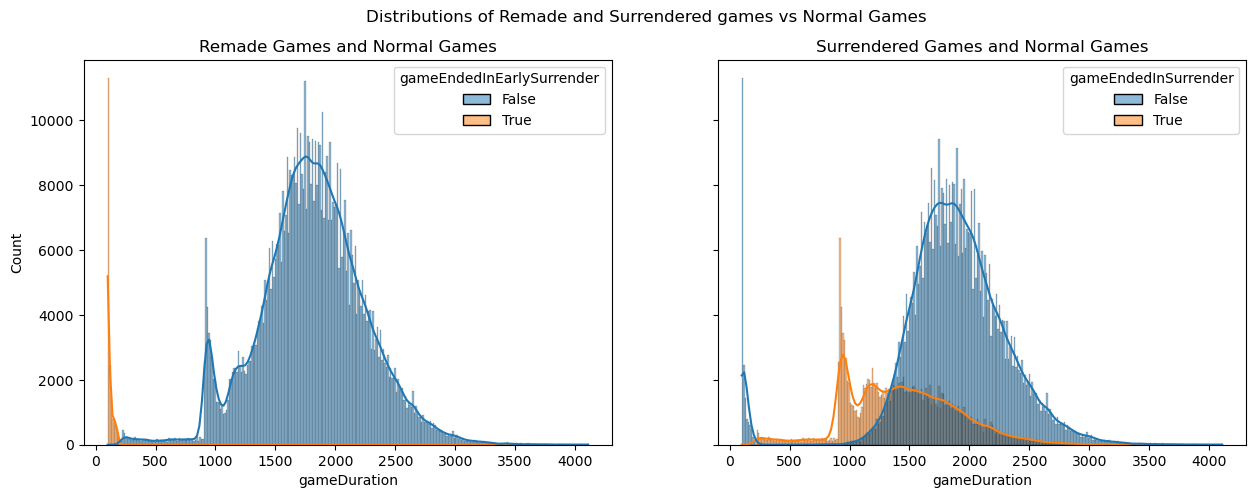

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Distributions of Remade and Surrendered games vs Normal Games')

# Remake
sns.histplot(data = df, x = 'gameDuration', hue = 'gameEndedInEarlySurrender', ax = axes[0], kde = True)
axes[0].set_title('Remade Games and Normal Games')

# Surrender
sns.histplot(data = df, x = 'gameDuration', hue = 'gameEndedInSurrender', ax = axes[1], kde = True)
axes[1].set_title('Surrendered Games and Normal Games')

Games ending very early are all remakes. Out of all surrendered games, a large proportion are surrendered around 16 minutes

In [16]:
print("Average Surrendered Game Duration: %.2f minutes" % (df['gameDuration'][df['gameEndedInSurrender'] == True].mean()/60))
print("Median Surrendered Game Duration: %.2f minutes" % (df['gameDuration'][df['gameEndedInSurrender'] == True].median()/60))
print("Percent of Surrendered Games between 15 and 17 minutes: %.2f%%" % (len(df[(df['gameEndedInSurrender'] == True) & (df['gameDuration'] >= 15*60) & (df['gameDuration'] <= 17*60)])*100 / len(df[df['gameEndedInSurrender'] == True])))


Average Surrendered Game Duration: 23.93 minutes
Median Surrendered Game Duration: 23.52 minutes
Percent of Surrendered Games between 15 and 17 minutes: 16.19%


## AP/AD damage dealt

Text(0.5, 1.0, 'Distribution of Physical Damage Dealt')

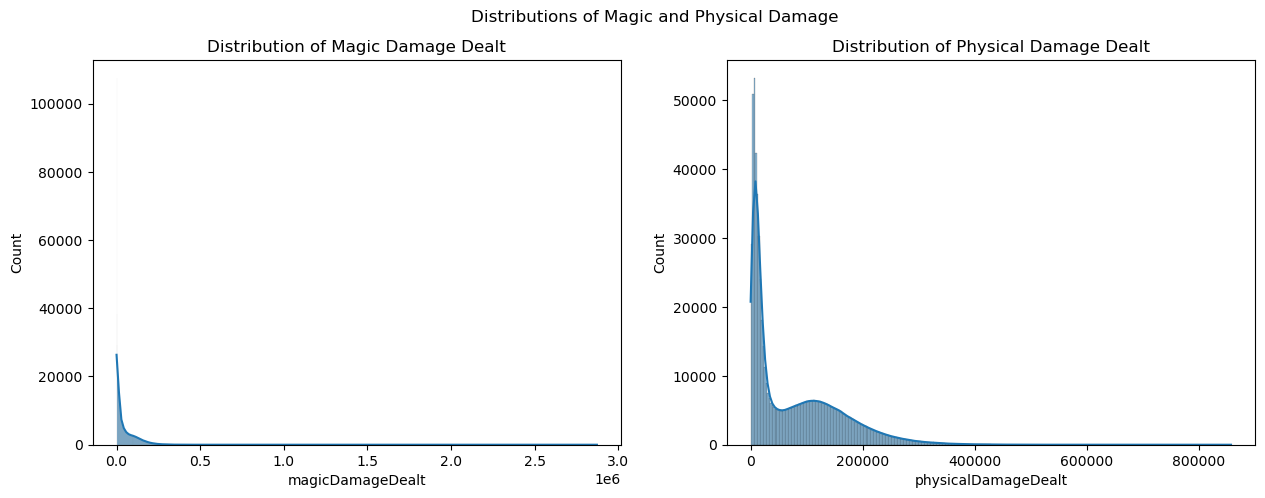

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))
fig.suptitle('Distributions of Magic and Physical Damage')

sns.histplot(data = df, x = 'magicDamageDealt', kde = True, ax = axes[0])
axes[0].set_title('Distribution of Magic Damage Dealt')

sns.histplot(data = df, x = 'physicalDamageDealt', kde = True, ax = axes[1])
axes[1].set_title('Distribution of Physical Damage Dealt')

There seems to be some bimodality/zero inflation. Makes sense as some champions can't do magic damage.

In [89]:
# Classify champions as AP/AD
df['AP'] = df['magicDamageDealt'] > df['physicalDamageDealt']

Plot Again

Text(0.5, 1.0, 'Distribution of Physical Damage Dealt')

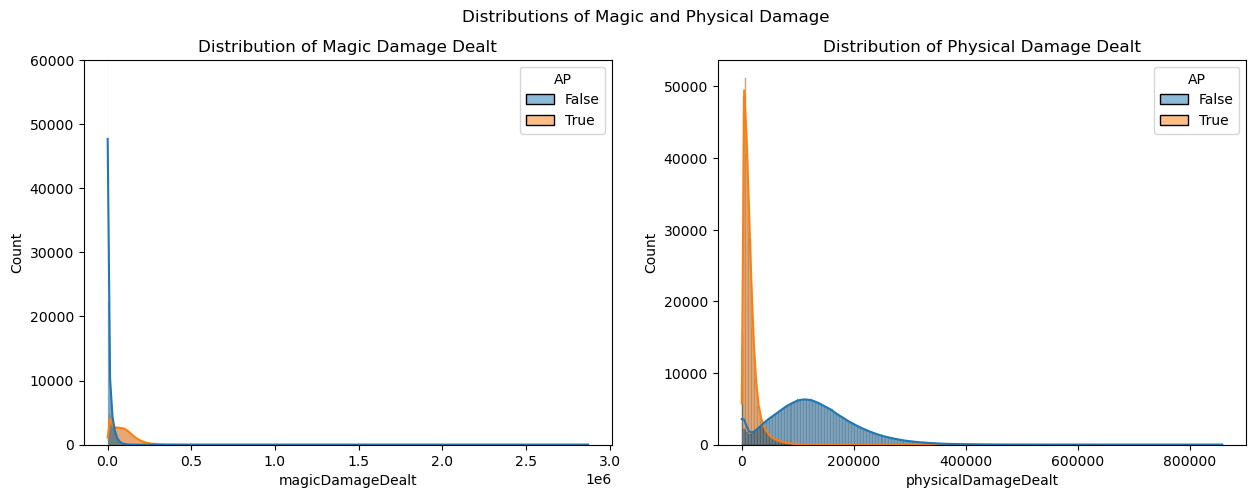

In [45]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))
fig.suptitle('Distributions of Magic and Physical Damage')

sns.histplot(data = df, x = 'magicDamageDealt', kde = True, ax = axes[0], hue = 'AP')
axes[0].set_title('Distribution of Magic Damage Dealt')
axes[0].set_ylim(0, 60000)

sns.histplot(data = df, x = 'physicalDamageDealt', kde = True, ax = axes[1], hue = 'AP')
axes[1].set_title('Distribution of Physical Damage Dealt')

Welp this explains the bimodality.

## KDA differences by role

Text(0.5, 1.0, 'Assists')

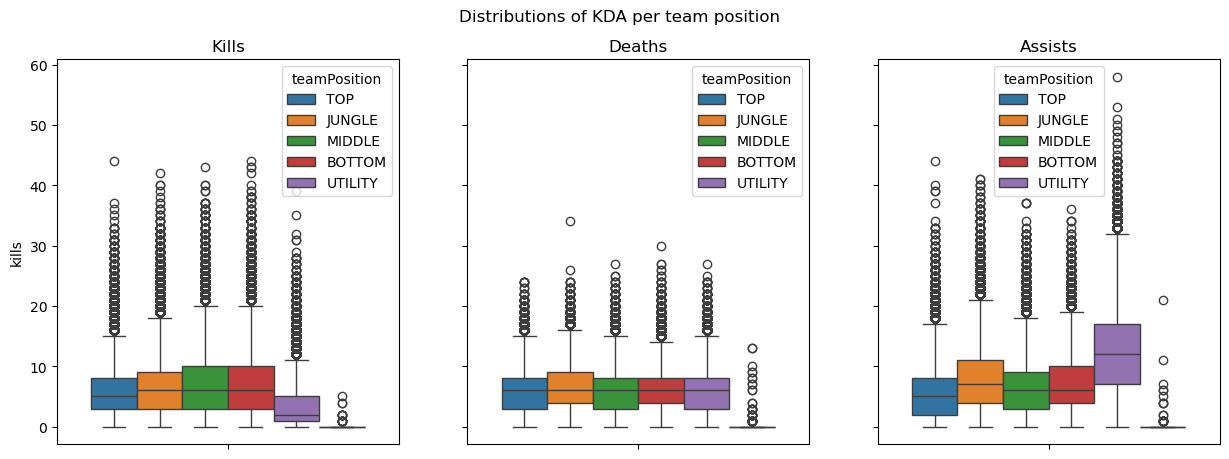

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Distributions of KDA per team position')

# Remake
sns.boxplot(data = df, y = 'kills', hue = 'teamPosition', ax = axes[0])
axes[0].set_title('Kills')

# Surrender
sns.boxplot(data = df, y = 'deaths', hue = 'teamPosition', ax = axes[1])
axes[1].set_title('Deaths')

# Assists
sns.boxplot(data = df, y = 'assists', hue = 'teamPosition', ax = axes[2])
axes[2].set_title('Assists')

## Correlations

<Axes: >

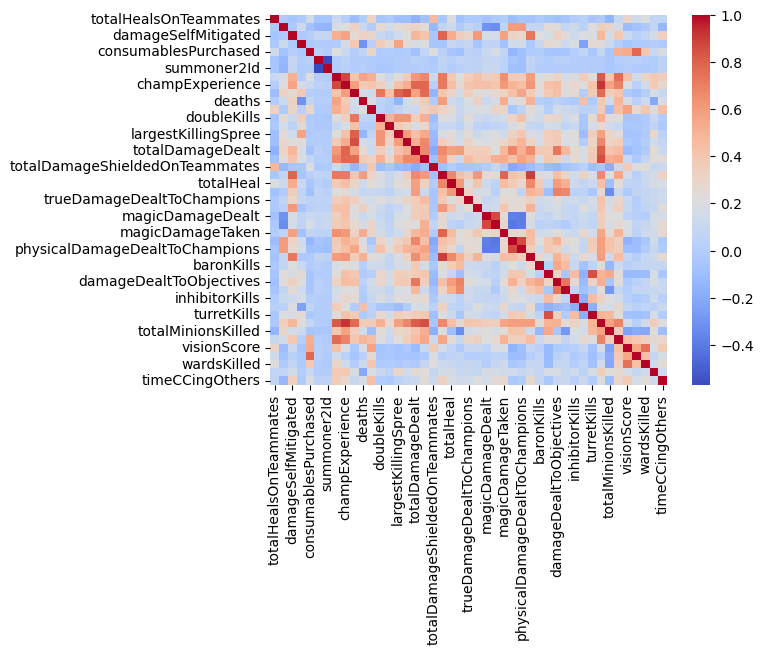

In [18]:
# Correlations between numeric features
corr = df.select_dtypes(include = np.number).corr()
sns.heatmap(corr, cmap = 'coolwarm')

We can see the data is multicollinear, which is expected from a game many features influence one another (i.e kills gets you gold, gold buys you items etc.)

## Correlation With Game Duration

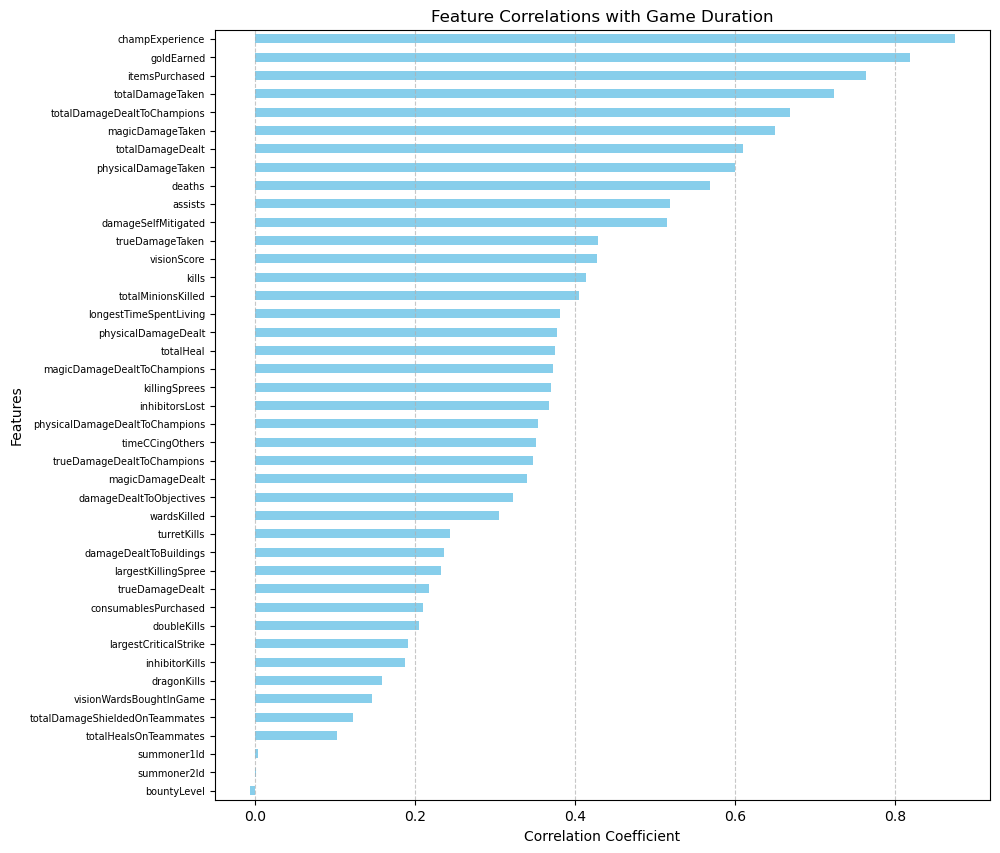

In [90]:
# Correlation with time
time_corrs = df.select_dtypes(include = np.number).corr()['gameDuration'].drop('gameDuration')

# Bar chart
plt.figure(figsize=(10, 10))
time_corrs.sort_values().plot(kind='barh', color='skyblue')
plt.title('Feature Correlations with Game Duration')
plt.xlabel('Correlation Coefficient')
plt.yticks(fontsize=7)
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Categorical Features

In [20]:
# Check cat features
df.select_dtypes(include = ['object', 'bool']).columns

Index(['teamPosition', 'championName', 'firstBloodAssist', 'firstBloodKill',
       'firstTowerAssist', 'firstTowerKill', 'gameEndedInEarlySurrender',
       'gameEndedInSurrender', 'win'],
      dtype='object')

In [21]:
# Check frequency of team positions
df['teamPosition'].value_counts()

teamPosition
JUNGLE     143835
BOTTOM     143816
UTILITY    143813
MIDDLE     143806
TOP        143794
              526
Name: count, dtype: int64

In [91]:
# Drop games with no team position
df = df.drop(index = df[df['teamPosition'] == ''].index)

In [23]:
# Frequency of role for each champion
champ_roles = pd.crosstab(df['championName'], df['teamPosition'], margins = False)
champ_roles

teamPosition,BOTTOM,JUNGLE,MIDDLE,TOP,UTILITY
championName,,,,,
Aatrox,8,35,170,6253,13
Ahri,42,7,3725,64,148
Akali,25,9,6217,1023,10
Akshan,233,15,1933,410,33
Alistar,4,12,41,72,1983
...,...,...,...,...,...
Zeri,1716,13,59,42,5
Ziggs,882,1,927,31,230
Zilean,9,3,154,51,1549


## Mutual Information
Mutual information measures the amount one random variable X tells us about another random variable Y. It is based on entropy stemming from information theory. Given two random variable X and Y, if they are independent, MI will be 0 as P(X,Y) = P(X)P(Y). If non-zero, then high MI tells us that knowing the value of X tells us a lot about the value of Y.

In [24]:
from sklearn.metrics import mutual_info_score

for feature in df.select_dtypes(include = ['object', 'bool']).columns:
    print(f"{feature}: ", mutual_info_score(df['championName'], df[feature]))

teamPosition:  1.099564233513885
championName:  4.915015355916426
firstBloodAssist:  0.009170483468742944
firstBloodKill:  0.008030416737750408
firstTowerAssist:  0.007659747818087199
firstTowerKill:  0.019875168521304228
gameEndedInEarlySurrender:  0.00016029194598125607
gameEndedInSurrender:  0.00033868931582875864
win:  0.0006906883978526424


All features except teamPosition seemingly tell us nothing about champions, we can most likely drop these features.

# Outliers

In [92]:
# Drop remade games (games that ended before 3 minutes)
df = df[df['gameEndedInEarlySurrender'] == False]

# Filter for AFK players
afk_players = df[(df['champExperience'] == 0) | (df['longestTimeSpentLiving'] == 0) | (df['itemsPurchased'] == 0)]
df = df.drop(index = afk_players.index)

# Games ending too early
trolled_games = df[(df['gameDuration'] < 900) & df['gameEndedInSurrender'] == True]
df = df.drop(index = trolled_games.index)

# Shape after dropping outliers
df.shape

(678003, 53)

# Feature Transformation

In [93]:
# Divide features correlated with time to be in a per second basis, leave rest normal
df_num = df.select_dtypes(include = np.number)
df[time_corrs[time_corrs > 0.2].index] = df[time_corrs[time_corrs > 0.2].index].div(df['gameDuration'], axis = 0)

# Log + c transform  
df[log_transform_columns] = np.log(df[log_transform_columns] + 1)

# Keep track of champion names indices
champion_names = df['championName']

# Drop irrevant features
df = df.drop(columns = ['gameDuration', 'summoner1Id', 'summoner2Id', 'gameEndedInEarlySurrender', 'championName',
                        'firstBloodAssist', 'firstBloodKill', 'firstTowerAssist', 'firstTowerKill', 'gameEndedInSurrender',
                        'win'], axis = 1)       

# Preprocessing

Standardizing + one hot encoding. PCA requires data to be on the same scale as it is reliant on the covariance matrix of features. 

In [94]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


# Define numerical and categorical feature names
num_features = df.select_dtypes(include = np.number).columns.tolist()
cat_features = df.drop(columns = num_features).columns.tolist()


# Define the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),  # Standardize numerical features
        ('cat', OneHotEncoder(sparse_output=False), cat_features) # One hot encode
    ]
)

# Transform the data
transformed_array = preprocessor.fit_transform(df)

# Get feature names for the transformed data
num_feature_names = num_features
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_features)
all_feature_names = num_feature_names + cat_feature_names.tolist()

# Convert transformed data back to a DataFrame
transformed_df = pd.DataFrame(transformed_array, columns=all_feature_names, index = champion_names.index)

# Check result
transformed_df

,totalHealsOnTeammates,largestCriticalStrike,damageSelfMitigated,bountyLevel,consumablesPurchased,champExperience,kills,deaths,assists,doubleKills,...,wardsKilled,longestTimeSpentLiving,timeCCingOthers,teamPosition_BOTTOM,teamPosition_JUNGLE,teamPosition_MIDDLE,teamPosition_TOP,teamPosition_UTILITY,AP_False,AP_True
0,-0.556278,0.181943,5.083428,0.046180,-0.714824,1.573219,0.270174,-0.100967,0.710607,-0.589473,...,-0.638050,-1.275545,0.632303,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-0.556278,-0.822735,1.332579,0.573346,-0.967890,1.143913,-0.029134,0.351111,1.509755,0.105189,...,-0.150569,-1.246261,-0.900073,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.556278,1.458583,0.008379,-0.480985,0.550504,0.695070,2.215673,1.481308,0.444224,0.799851,...,-0.881791,-1.120115,-0.991107,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-0.556278,1.454835,-0.679796,2.682007,1.562768,1.047497,2.066019,0.577151,-0.488116,2.189174,...,-0.394310,-1.052537,-0.839440,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.061282,-0.822735,-0.164310,0.573346,-0.714824,-0.589550,-0.927057,-0.553046,1.642947,-0.589473,...,-0.638050,-1.153904,0.154620,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719585,-0.556278,1.400110,0.385599,-0.480985,-0.146345,2.571434,1.801409,0.984181,-0.846672,0.147975,...,-0.881791,-0.880026,-0.465862,0.0,0.0,0.0,1.0,0.0,1.0,0.0
719586,-0.556278,-0.822735,0.789111,-0.480985,-0.146345,1.127961,0.212696,-0.215628,-0.139697,0.147975,...,0.411975,0.461523,0.140406,0.0,1.0,0.0,0.0,0.0,0.0,1.0
719587,-0.556278,1.304221,1.844117,-0.480985,-0.414998,1.564585,0.530438,0.264296,-0.139697,-0.589473,...,-0.881791,-0.619369,-0.210047,0.0,0.0,1.0,0.0,0.0,1.0,0.0
719588,-0.556278,-0.822735,0.453083,-0.480985,-0.414998,-0.370191,-0.740533,0.024334,0.850068,0.147975,...,-0.881791,-0.176968,0.172191,0.0,0.0,0.0,0.0,1.0,0.0,1.0


# PCA

We can apply PCA to find the features that explain the most variance in our dataset. By exploring the loadings of the top principle components, we can drastically reduce the number of features we need to cluster on.

In [98]:
from sklearn.decomposition import PCA

# Capture 80% variance
pca = PCA(n_components = 0.8, random_state=1)
# Fit to df
pca_fitted = pca.fit(transformed_df)

In [101]:
# Visualize loadings of principal components
loadings = pd.DataFrame(data = pca.components_.T, index = transformed_df.columns, columns = [f"PC{i+1}" for i in range(len(pca.components_))])
# Show first few loadings (styler object)
loadings_matrix = loadings.round(2).head(5).style.background_gradient(cmap='coolwarm')
loadings_matrix

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
totalHealsOnTeammates,-0.090000,-0.070000,-0.020000,-0.210000,0.050000,0.070000,-0.350000,-0.040000,-0.450000,0.060000,-0.210000,-0.000000,-0.290000,-0.000000
largestCriticalStrike,0.130000,-0.060000,-0.240000,-0.180000,0.070000,-0.030000,-0.110000,-0.080000,-0.210000,0.160000,-0.030000,0.170000,0.190000,-0.030000
damageSelfMitigated,0.120000,0.270000,0.060000,0.040000,0.110000,0.260000,-0.020000,0.300000,-0.010000,-0.070000,-0.010000,-0.060000,0.030000,0.070000
bountyLevel,0.130000,-0.150000,0.140000,-0.080000,-0.070000,-0.060000,-0.100000,0.040000,0.060000,-0.090000,-0.020000,-0.130000,0.150000,0.790000
consumablesPurchased,-0.130000,-0.070000,0.150000,-0.220000,0.190000,0.000000,0.440000,0.010000,-0.120000,-0.010000,-0.010000,0.030000,-0.130000,0.090000


In [102]:
pca.explained_variance_

array([9.22044693, 4.5519729 , 4.17454771, 3.26033958, 2.37908102,
       1.82118933, 1.62985112, 1.22039815, 1.11764889, 0.96419792,
       0.85302833, 0.83726516, 0.76091413, 0.73890779])

In [103]:
# Print top 10 loadings for each principal component
for pc in loadings.columns:
    
    print(f"Top loadings for {pc}:")
    # Find 10 absolute largest loadings
    top_loadings = loadings[pc].apply(abs).nlargest(10)
    # For each loading, get index and value
    for idx, value in top_loadings.items():
        # Locate value (not abs) by index
        real_value = loadings[pc].loc[idx].round(2)
        # Print index (feature name) and value
        print(f"{idx}: {real_value}")
    print("----------------------")

Top loadings for PC1:
goldEarned: 0.28
totalDamageDealt: 0.27
kills: 0.24
physicalDamageDealt: 0.24
champExperience: 0.24
damageDealtToObjectives: 0.23
physicalDamageDealtToChampions: 0.22
totalDamageDealtToChampions: 0.22
killingSprees: 0.21
largestKillingSpree: 0.2
----------------------
Top loadings for PC2:
totalDamageTaken: 0.35
physicalDamageTaken: 0.3
damageSelfMitigated: 0.27
trueDamageDealt: 0.27
totalMinionsKilled: -0.27
totalHeal: 0.25
damageDealtToBuildings: -0.22
dragonKills: 0.21
magicDamageTaken: 0.2
deaths: 0.19
----------------------
Top loadings for PC3:
magicDamageDealtToChampions: 0.36
magicDamageDealt: 0.32
physicalDamageDealt: -0.28
physicalDamageDealtToChampions: -0.26
largestCriticalStrike: -0.24
assists: 0.23
visionScore: 0.2
timeCCingOthers: 0.18
visionWardsBoughtInGame: 0.17
AP_False: -0.16
----------------------
Top loadings for PC4:
magicDamageDealt: 0.32
magicDamageDealtToChampions: 0.3
wardsKilled: -0.3
visionScore: -0.29
visionWardsBoughtInGame: -0.27
to

From pc loadings:
goldEarned, totalDamageTaken, magicDamageDealtToChampions, visionScore, physicalDamageDealtToChampions, deaths, turretKills, seem to be the most defining features and explain most of the variance. This lines up with my game knowledge of what differentiates champions. 

In [104]:
important_features = ['goldEarned', 'totalDamageTaken', 'magicDamageDealtToChampions',
                     'visionScore', 'physicalDamageDealtToChampions', 'deaths',
                       'turretKills', 'teamPosition_BOTTOM',	'teamPosition_JUNGLE',
                           	'teamPosition_MIDDLE',	'teamPosition_TOP',	'teamPosition_UTILITY']

# Clustering

To determine the optimal number of clusters, the elbow method and silhouette method can be applied. Silhouette may take too long due to dimensions of df.

## Elbow Method

<Axes: xlabel='Clusters', ylabel='WCSS'>

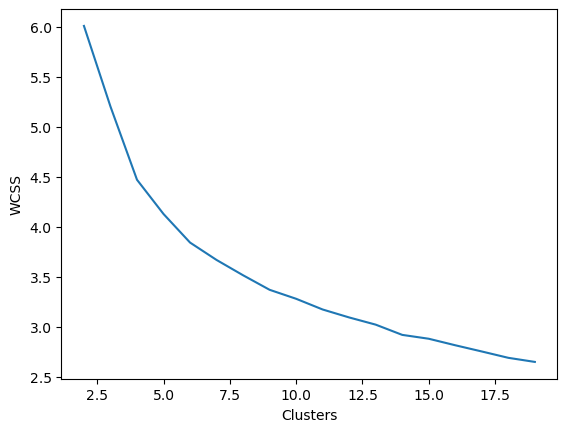

In [133]:
from sklearn.cluster import MiniBatchKMeans
from scipy.spatial.distance import cdist

# Dropping champion name
X = transformed_df[['goldEarned', 'totalDamageTaken', 'magicDamageDealtToChampions',
                     'visionScore', 'physicalDamageDealtToChampions', 'deaths',
                       'turretKills', 'teamPosition_BOTTOM',	'teamPosition_JUNGLE',
                           	'teamPosition_MIDDLE',	'teamPosition_TOP',	'teamPosition_UTILITY']]


clusters_list = []
wcss_list = []

for k in range(2,20):
    kmeans = MiniBatchKMeans(n_clusters= k, init = 'k-means++', random_state=42)
    fitted_kmeans = kmeans.fit(X)
    wcss = sum(np.min(cdist(X, fitted_kmeans.cluster_centers_, 'euclidean'), axis = 1) ** 2 / X.shape[0])
    clusters_list.append(k)
    wcss_list.append(wcss)

elbow_method = {'Clusters': clusters_list, 'WCSS': wcss_list}
elbow_df = pd.DataFrame(elbow_method)
sns.lineplot(data = elbow_df, x = 'Clusters', y = 'WCSS')

Elbow method giving unreliable results, can iterate through number of clusters manually based on game knowledge and intuition. Figure out optimal amount of clusters based on iterative results.

In [134]:
kmeans = MiniBatchKMeans(n_clusters=15, random_state = 42)
kmeans.fit(X)

# Create new column in dataframe with cluster labels
X['cluster'] = kmeans.labels_

# Add champion names back in
X['championName'] = champion_names

C:\Users\toirt\AppData\Local\Temp\ipykernel_24988\1980359783.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = kmeans.labels_
C:\Users\toirt\AppData\Local\Temp\ipykernel_24988\1980359783.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['championName'] = champion_names


In [135]:
X['cluster'].value_counts()

cluster
5     74156
3     56479
11    54620
8     51624
1     51285
4     49222
14    49171
9     44915
7     44460
10    44106
6     42167
12    39354
2     37059
0     23462
13    15923
Name: count, dtype: int64

In [136]:
# Step 1: Calculate the occurrence of each cluster for each champion
cluster_counts = (
    X.groupby(['championName', 'cluster'])
    .size()
    .reset_index(name='count')
)

# Step 2: Rank clusters based on their count for each champion
cluster_counts['rank'] = (
    cluster_counts.groupby('championName')['count']
    .rank(method='dense', ascending=False)
)

# Step 3: Keep only the top 2 clusters for each champion
top_clusters = cluster_counts[cluster_counts['rank'] == 1]

# Step 4: Merge with the original dataset to calculate feature averages
merged_data = X.merge(top_clusters[['championName', 'cluster']], on=['championName', 'cluster'])

# Step 5: Calculate averages for each feature based on the top 2 clusters
result = (
    merged_data.groupby(['championName', 'cluster'])
    [important_features]
    .median()
    .reset_index()
)

In [137]:
from sklearn.preprocessing import MinMaxScaler

# Normalize for better tableau viz
scaler = MinMaxScaler()
result_normalized = pd.DataFrame(scaler.fit_transform(result[important_features]), columns = important_features)
result_normalized['championName'] = result['championName']
result_normalized['cluster'] = result['cluster']

In [138]:
result_normalized

,goldEarned,totalDamageTaken,magicDamageDealtToChampions,visionScore,physicalDamageDealtToChampions,deaths,turretKills,teamPosition_BOTTOM,teamPosition_JUNGLE,teamPosition_MIDDLE,teamPosition_TOP,teamPosition_UTILITY,championName,cluster
0,0.430951,0.803552,0.393525,0.039180,0.893768,0.713081,0.179440,0.0,0.0,0.0,1.0,0.0,Aatrox,2
1,0.457580,0.407716,0.791332,0.072020,0.195782,0.730613,0.134811,0.0,0.0,1.0,0.0,0.0,Ahri,11
2,0.495281,0.527693,0.882212,0.050722,0.168639,0.692653,0.000000,0.0,0.0,1.0,0.0,0.0,Akali,11
3,0.599031,0.322670,0.309768,0.083744,0.888682,0.278293,0.178828,0.0,0.0,1.0,0.0,0.0,Akshan,1
4,0.106031,0.573938,0.542613,0.714971,0.175640,0.855396,0.000000,0.0,0.0,0.0,0.0,1.0,Alistar,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,0.634352,0.343827,0.517232,0.074741,0.772897,0.360594,0.195002,1.0,0.0,0.0,0.0,0.0,Zeri,5
163,0.630247,0.206724,0.959011,0.098971,0.098339,0.118172,0.650955,0.0,0.0,1.0,0.0,0.0,Ziggs,6
164,0.196189,0.233341,0.637828,0.797036,0.121761,0.092998,0.000000,0.0,0.0,0.0,0.0,1.0,Zilean,3
165,0.468602,0.378123,0.854475,0.078412,0.237197,0.741240,0.000000,0.0,0.0,1.0,0.0,0.0,Zoe,11


In [139]:
pd.set_option('display.max_colwidth', None)
print(result_normalized.groupby('cluster')['championName'].apply(list))

cluster
0                                                                                                                                                                                                                                                    [DrMundo, Gwen, Kayle, Mordekaiser]
1                                                                                                                                                                        [Akshan, Darius, Gangplank, Garen, Jayce, Naafiri, Poppy, Qiyana, Quinn, Riven, Talon, Urgot, Yasuo, Yone, Zed]
2                                                                                                                                                                   [Aatrox, Camille, Fiora, Gnar, Illaoi, Irelia, Jax, KSante, Kled, Nasus, Olaf, Renekton, Sett, Shen, Sion, Volibear]
3                                                                                                                                                    

In [140]:
# Export to csv for tableau viz
result_normalized.to_csv("clusterdata2.csv", index = False)